In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    order_by(Measurement.date).all()
results

[('2010-06-01', 78.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 73.0),
 ('2010-06-01', 77.0),
 ('2010-06-01', 69.0),
 ('2010-06-01', 76.0),
 ('2010-06-01', 71.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 72.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 71.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 78.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 75.0),
 ('2010-06-03', 74.0),
 ('2010-06-03', 77.0),
 ('2010-06-03', 67.0),
 ('2010-06-03', 76.0),
 ('2010-06-03', 72.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 73.0),
 ('2010-06-04', 76.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 70.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 72.0),
 ('2010-06-04', 74.0),
 ('2010-06-04', 68.0),
 ('2010-06-05', 77.0),
 ('2010-06-05', 74.0),
 ('2010-06-05', 72.0),
 ('2010-06-05', 73.0),
 ('2010-06-05', 78.0),
 ('2010-06-05', 76.0),
 ('2010-06-05', 79.0),
 ('2010-06-

In [5]:
#  3. Convert the June temperatures to a list.
june_dates = [date[0] for date in results]
june_temps = [temp[1] for temp in results]
june_temps

[78.0,
 74.0,
 73.0,
 77.0,
 69.0,
 76.0,
 71.0,
 74.0,
 70.0,
 76.0,
 76.0,
 72.0,
 76.0,
 70.0,
 76.0,
 71.0,
 76.0,
 78.0,
 78.0,
 75.0,
 74.0,
 77.0,
 67.0,
 76.0,
 72.0,
 78.0,
 73.0,
 76.0,
 75.0,
 73.0,
 75.0,
 70.0,
 73.0,
 72.0,
 74.0,
 68.0,
 77.0,
 74.0,
 72.0,
 73.0,
 78.0,
 76.0,
 79.0,
 79.0,
 78.0,
 75.0,
 75.0,
 73.0,
 77.0,
 77.0,
 79.0,
 74.0,
 77.0,
 75.0,
 74.0,
 76.0,
 77.0,
 71.0,
 69.0,
 75.0,
 78.0,
 75.0,
 75.0,
 79.0,
 77.0,
 73.0,
 77.0,
 71.0,
 78.0,
 75.0,
 73.0,
 79.0,
 72.0,
 78.0,
 73.0,
 80.0,
 75.0,
 79.0,
 75.0,
 75.0,
 77.0,
 72.0,
 78.0,
 75.0,
 75.0,
 78.0,
 83.0,
 76.0,
 77.0,
 76.0,
 81.0,
 75.0,
 78.0,
 75.0,
 74.0,
 70.0,
 76.0,
 74.0,
 78.0,
 78.0,
 76.0,
 74.0,
 78.0,
 79.0,
 77.0,
 77.0,
 73.0,
 73.0,
 74.0,
 70.0,
 71.0,
 76.0,
 78.0,
 74.0,
 73.0,
 76.0,
 73.0,
 75.0,
 69.0,
 76.0,
 78.0,
 74.0,
 76.0,
 77.0,
 76.0,
 70.0,
 74.0,
 73.0,
 77.0,
 75.0,
 75.0,
 76.0,
 75.0,
 75.0,
 72.0,
 78.0,
 73.0,
 77.0,
 70.0,
 70.0,
 73.0,
 70.0,
 73.0,

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(data=june_temps, columns=['June Temps'])
june_temps_df

june_temps_with_dates_df = pd.DataFrame(data=results, columns=['Date','June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_summary = june_temps_df.describe()
june_summary

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    order_by(Measurement.date).all()
results

[('2010-12-01', 76.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 78.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 70.0),
 ('2010-12-01', 71.0),
 ('2010-12-02', 72.0),
 ('2010-12-02', 73.0),
 ('2010-12-02', 75.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 73.0),
 ('2010-12-03', 71.0),
 ('2010-12-03', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 72.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 67.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 72.0),
 ('2010-12-04', 78.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 75.0),
 ('2010-12-04', 77.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 71.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 78.0),
 ('2010-12-05', 66.0),
 ('2010-12-05', 69.0),
 ('2010-12-05', 69.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 78.0),
 ('2010-12-

In [9]:
# 7. Convert the December temperatures to a list.
dec_dates = [date[0] for date in results]
dec_temps = [temp[1] for temp in results]
dec_temps

[76.0,
 73.0,
 73.0,
 72.0,
 78.0,
 72.0,
 70.0,
 71.0,
 72.0,
 73.0,
 75.0,
 71.0,
 74.0,
 71.0,
 74.0,
 70.0,
 74.0,
 73.0,
 71.0,
 70.0,
 74.0,
 72.0,
 74.0,
 67.0,
 74.0,
 74.0,
 72.0,
 78.0,
 74.0,
 75.0,
 77.0,
 73.0,
 71.0,
 73.0,
 78.0,
 66.0,
 69.0,
 69.0,
 64.0,
 66.0,
 64.0,
 66.0,
 78.0,
 61.0,
 61.0,
 65.0,
 61.0,
 64.0,
 64.0,
 71.0,
 66.0,
 76.0,
 69.0,
 58.0,
 66.0,
 62.0,
 67.0,
 66.0,
 62.0,
 67.0,
 73.0,
 65.0,
 60.0,
 68.0,
 63.0,
 77.0,
 75.0,
 70.0,
 76.0,
 74.0,
 77.0,
 71.0,
 77.0,
 73.0,
 66.0,
 65.0,
 64.0,
 68.0,
 63.0,
 67.0,
 65.0,
 65.0,
 64.0,
 69.0,
 69.0,
 64.0,
 72.0,
 69.0,
 72.0,
 72.0,
 67.0,
 68.0,
 71.0,
 70.0,
 75.0,
 70.0,
 65.0,
 69.0,
 68.0,
 69.0,
 70.0,
 69.0,
 75.0,
 67.0,
 68.0,
 66.0,
 80.0,
 71.0,
 78.0,
 69.0,
 71.0,
 74.0,
 71.0,
 67.0,
 74.0,
 71.0,
 74.0,
 74.0,
 72.0,
 70.0,
 72.0,
 74.0,
 71.0,
 66.0,
 73.0,
 67.0,
 68.0,
 68.0,
 68.0,
 68.0,
 66.0,
 65.0,
 63.0,
 65.0,
 66.0,
 68.0,
 68.0,
 66.0,
 66.0,
 64.0,
 63.0,
 68.0,
 69.0,

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(data = dec_temps, columns = ['December Temps'])
dec_temps_df

dec_temps_with_dates = pd.DataFrame(data=results, columns=['Date','December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_summary = dec_temps_df.describe()
dec_summary

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

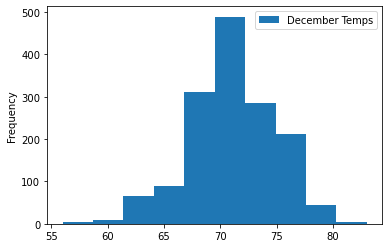

In [17]:
dec_temps_df.plot.hist(bins=10)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

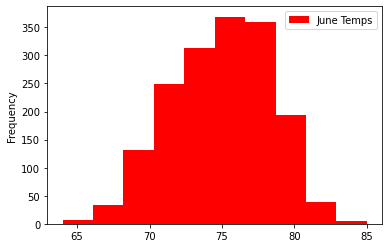

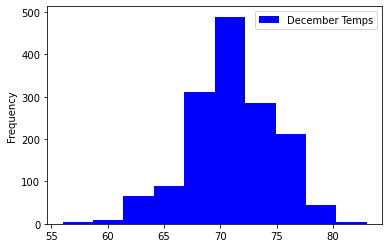

In [20]:
june_temps_df.plot.hist(bins=10, color="red")
dec_temps_df.plot.hist(bins=10, color="blue")
plt.tight_layout